# Import Data

In [ ]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras.utils as image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.regularizers import l1
import keras
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder

**IMPORT IMAGE DATA FROM GOOGLE DRIVE CLOUD.**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'   SEPR


# Define Confusion Matrix Function

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [ ]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar',
             'keyboard', 'mallet', 'organ', 'reed',
             'string', 'vocal'])

# Import and Prepare Images

In [ ]:
#Define function to load images

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

In [ ]:
# Define constants
IMAGE_HEIGHT = 308
IMAGE_WIDTH = 775
TARGET_HEIGHT = 224
TARGET_WIDTH = 224
N_CHANNELS = 3

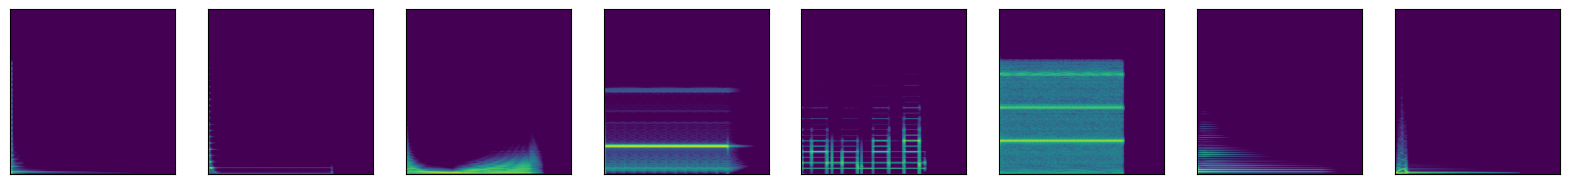

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train2000_images/0', 0)
show_images(images)

x += images
y += labels

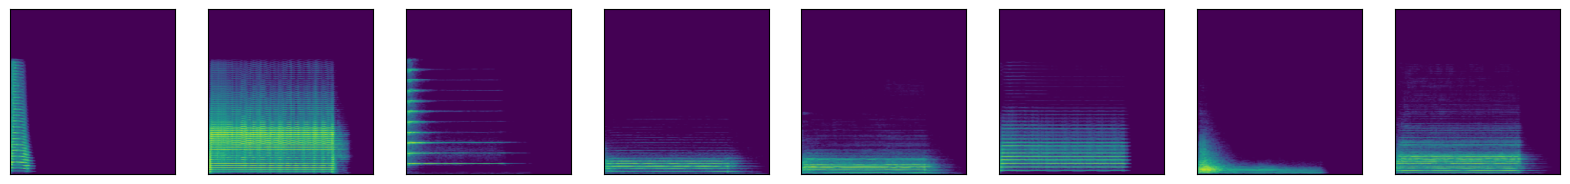

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train2000_images/1', 1)
show_images(images)

x += images
y += labels

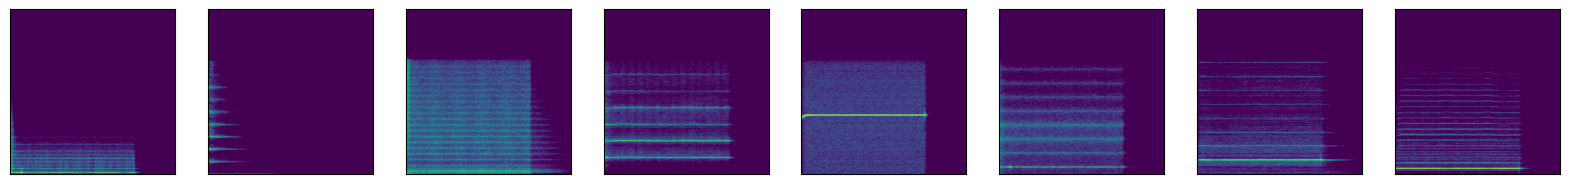

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train2000_images/2', 2)
show_images(images)

x += images
y += labels

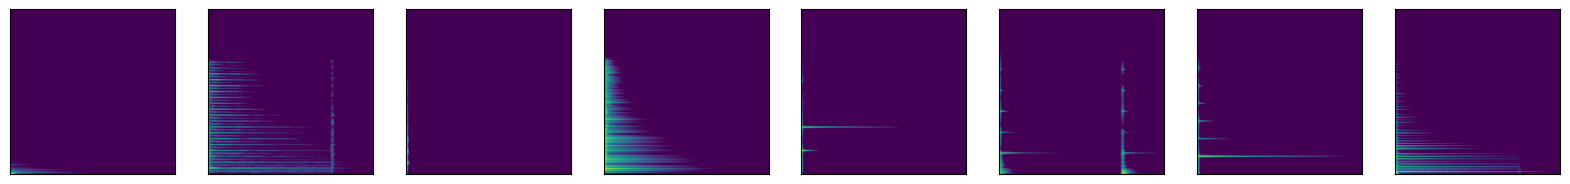

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train2000_images/3', 3)
show_images(images)

x += images
y += labels

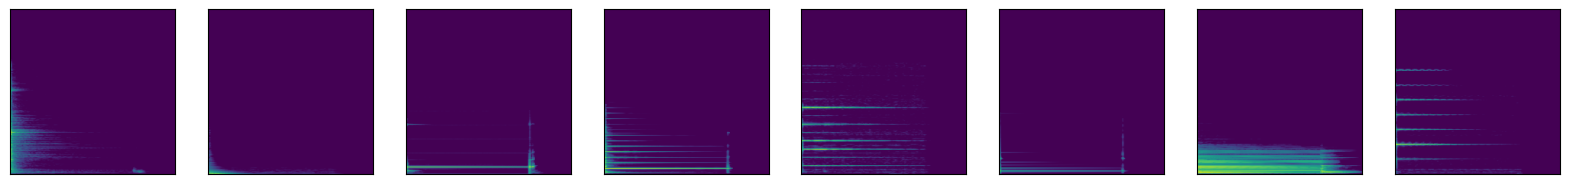

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train2000_images/4', 4)
show_images(images)

x += images
y += labels

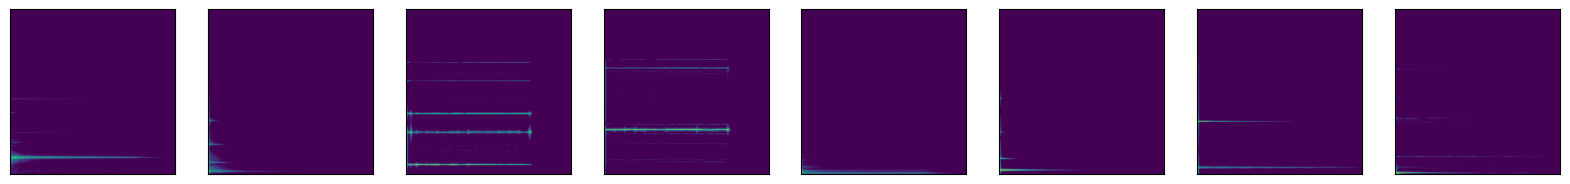

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train2000_images/5', 5)
show_images(images)

x += images
y += labels

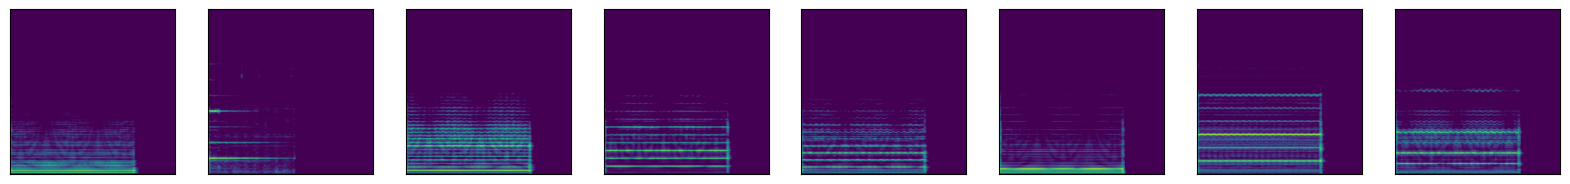

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train2000_images/6', 6)
show_images(images)

x += images
y += labels

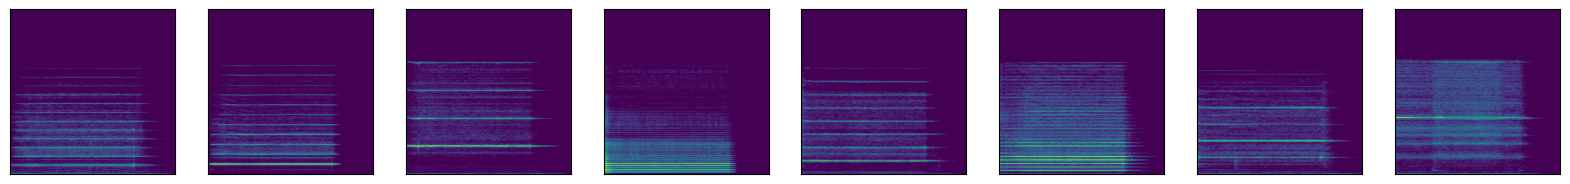

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train2000_images/7', 7)
show_images(images)

x += images
y += labels

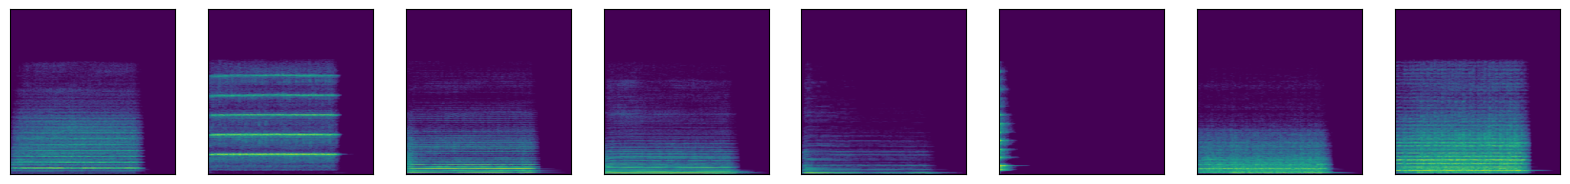

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train2000_images/8', 8)
show_images(images)

x += images
y += labels

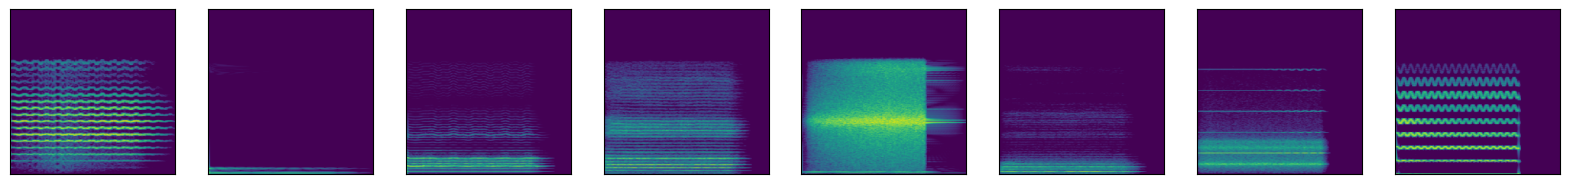

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train2000_images/10', 9)
show_images(images)

x += images
y += labels

# Prepare X and y Data for the Model

In [ ]:
label_encoder = LabelEncoder()



X_train_norm = np.array(x) / 255




y_train_encoded = label_encoder.fit_transform(y)



# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train_encoded)



In [ ]:
y_train_one_hot.shape

(20000, 10)

In [ ]:
X_train_norm.shape

(20000, 224, 224, 3)

In [ ]:
# Define number of classes
num_classes = len(set(y_train))
print(num_classes)

10


In [ ]:
import pickle
with open('/content/df_features_train2000.pickle', 'rb') as f:
    df_train = pickle.load(f)

df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_065-022-025,1,-304.045654,210.442856,-29.364252,-12.138075,22.309427,6.090194,4.480891,5.651807,8.733890,...,0.039815,0.026104,0.360312,0.028782,0.020647,0.095135,0.168710,0.682694,0.268308,0
bass_synthetic_123-023-127,1,-581.122681,19.400276,13.161098,12.068445,10.101112,9.067916,7.615374,6.580825,5.609818,...,0.098517,0.063681,0.055177,0.216819,0.042083,0.123787,0.144742,0.461804,0.491225,0
bass_synthetic_044-059-100,0,-504.347687,50.102257,31.777626,25.453201,22.285028,14.276178,7.285074,2.552428,-3.053812,...,0.086290,0.071110,0.059363,0.047126,0.048548,0.058193,0.049593,0.047131,0.772857,0
bass_synthetic_080-097-127,1,-601.433105,1.155329,-3.351946,3.307853,3.557914,-0.089697,-1.921454,2.518064,3.118459,...,0.238513,0.159288,0.209015,0.139147,0.163444,0.201258,0.268439,0.209768,0.241758,0
bass_synthetic_084-069-050,1,-277.723816,78.039810,-47.809990,-9.798298,-23.077721,-1.533361,-6.860663,9.153872,1.950342,...,0.045113,0.210715,0.047381,0.053805,0.041415,0.331384,0.799234,0.137420,0.029709,0


In [ ]:
x_numerical_data = df_train.drop(labels=['targets'], axis=1)
y_numerical_data = df_train['targets']

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded_numerical_data = label_encoder.fit_transform(y_numerical_data)
y_train_one_hot_numerical_data = to_categorical(y_train_encoded_numerical_data)

In [ ]:
y_train_encoded_numerical_data.shape

(20000,)

In [ ]:
from keras.utils import to_categorical

# Convert numerical labels to one-hot encoded format
y_train_one_hot_x = to_categorical(y_train_encoded_numerical_data, num_classes=10)


In [ ]:
y_train_one_hot_x.shape

(20000, 10)

In [ ]:
x_numerical_data.shape

(20000, 166)

In [ ]:
# Define the image input shape
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
image_input = Input(shape=(224, 224, 3), name='image_input')
# Convolutional layers for image processing
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(image_input)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten1 = Flatten()(pool1)

# Define the numerical input shape
numerical_input = Input(shape=(166,), name='numerical_input')
# Fully connected layers for numerical data processing
dense1 = Dense(64, activation='relu')(numerical_input)
dense2 = Dense(32, activation='relu')(dense1)

# Concatenate the outputs from image and numerical processing
concatenated = concatenate([flatten1, dense2])

# Final fully connected layers for joint learning
dense3 = Dense(64, activation='relu')(concatenated)
output = Dense(num_classes, activation='softmax')(dense3)

In [ ]:
# Create the model
from tensorflow.keras.models import Model

model = Model(inputs=[image_input, numerical_input], outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image_input (InputLayer)    [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 222, 222, 32)         896       ['image_input[0][0]']         
                                                                                                  
 conv2d_3 (Conv2D)           (None, 220, 220, 64)         18496     ['conv2d_2[0][0]']            
                                                                                                  
 numerical_input (InputLaye  [(None, 166)]                0         []                            
 r)                                                                                         

In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes)

In [ ]:
model.fit({'image_input': X_train_norm, 'numerical_input': x_numerical_data},
          y_train_one_hot,
          epochs=10,
          batch_size=128)

Epoch 1/10
157/157 [==============================] - 518s 3s/step - loss: 2.3360 - accuracy: 0.4045
Epoch 2/10
157/157 [==============================] - 517s 3s/step - loss: 1.0830 - accuracy: 0.6180
Epoch 3/10
157/157 [==============================] - 519s 3s/step - loss: 0.8869 - accuracy: 0.6852
Epoch 4/10
157/157 [==============================] - 520s 3s/step - loss: 0.7607 - accuracy: 0.7290
Epoch 5/10
157/157 [==============================] - 521s 3s/step - loss: 0.6755 - accuracy: 0.7604
Epoch 6/10
157/157 [==============================] - 520s 3s/step - loss: 0.5908 - accuracy: 0.7878
Epoch 7/10
157/157 [==============================] - 521s 3s/step - loss: 0.5351 - accuracy: 0.8120
Epoch 8/10
157/157 [==============================] - 521s 3s/step - loss: 0.4807 - accuracy: 0.8309
Epoch 9/10
157/157 [==============================] - 520s 3s/step - loss: 0.4318 - accuracy: 0.8478
Epoch 10/10
157/157 [==============================] - 525s 3s/step - loss: 0.3947 - accura

In [ ]:
model.fit({'image_input': X_train_norm, 'numerical_input': x_numerical_data},
          y_train_one_hot,
          epochs=10,
          batch_size=128)

Epoch 1/10
157/157 [==============================] - 520s 3s/step - loss: 0.3555 - accuracy: 0.8713
Epoch 2/10
157/157 [==============================] - 519s 3s/step - loss: 0.3230 - accuracy: 0.8846
Epoch 3/10
157/157 [==============================] - 519s 3s/step - loss: 0.2920 - accuracy: 0.8928
Epoch 4/10
157/157 [==============================] - 520s 3s/step - loss: 0.2684 - accuracy: 0.9061
Epoch 5/10
157/157 [==============================] - 520s 3s/step - loss: 0.2476 - accuracy: 0.9146
Epoch 6/10
157/157 [==============================] - 521s 3s/step - loss: 0.2293 - accuracy: 0.9184
Epoch 7/10
157/157 [==============================] - 522s 3s/step - loss: 0.1904 - accuracy: 0.9342
Epoch 8/10
157/157 [==============================] - 522s 3s/step - loss: 0.1834 - accuracy: 0.9365
Epoch 9/10
157/157 [==============================] - 522s 3s/step - loss: 0.1782 - accuracy: 0.9391
Epoch 10/10
157/157 [==============================] - 526s 3s/step - loss: 0.1460 - accura